<a href="https://colab.research.google.com/github/PRihana/Machine-learning/blob/master/04_04_2020(ML)LinearRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [0]:
data = pd.read_csv("/content/bostonhousing.csv")
data.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [0]:
data.isnull().sum().sum()

0

In [0]:
data.dtypes

crim       float64
zn         float64
indus      float64
chas         int64
nox        float64
rm         float64
age        float64
dis        float64
rad          int64
tax          int64
ptratio    float64
b          float64
lstat      float64
medv       float64
dtype: object

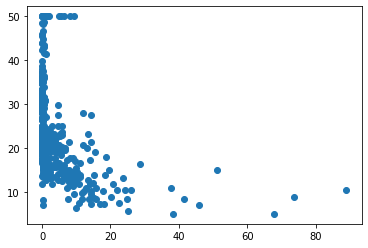

In [0]:
plt.scatter(data['crim'],data['medv'])

In [0]:
data.corr()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
crim,1.000000,-0.200469,0.406583,-0.055892,0.420972,-0.219247,0.352734,-0.379670,0.625505,0.582764,0.289946,-0.385064,0.455621,-0.388305
zn,-0.200469,1.000000,-0.533828,-0.042697,-0.516604,0.311991,-0.569537,0.664408,-0.311948,-0.314563,-0.391679,0.175520,-0.412995,0.360445
indus,0.406583,-0.533828,1.000000,0.062938,0.763651,-0.391676,0.644779,-0.708027,0.595129,0.720760,0.383248,-0.356977,0.603800,-0.483725
chas,-0.055892,-0.042697,0.062938,1.000000,0.091203,0.091251,0.086518,-0.099176,-0.007368,-0.035587,-0.121515,0.048788,-0.053929,0.175260
nox,0.420972,-0.516604,0.763651,0.091203,1.000000,-0.302188,0.731470,-0.769230,0.611441,0.668023,0.188933,-0.380051,0.590879,-0.427321
rm,-0.219247,0.311991,-0.391676,0.091251,-0.302188,1.000000,-0.240265,0.205246,-0.209847,-0.292048,-0.355501,0.128069,-0.613808,0.695360
age,0.352734,-0.569537,0.644779,0.086518,0.731470,-0.240265,1.000000,-0.747881,0.456022,0.506456,0.261515,-0.273534,0.602339,-0.376955
dis,-0.379670,0.664408,-0.708027,-0.099176,-0.769230,0.205246,-0.747881,1.000000,-0.494588,-0.534432,-0.232471,0.291512,-0.496996,0.249929
rad,0.625505,-0.311948,0.595129,-0.007368,0.611441,-0.209847,0.456022,-0.494588,1.000000,0.910228,0.464741,-0.444413,0.488676,-0.381626
tax,0.582764,-0.314563,0.720760,-0.035587,0.668023,-0.292048,0.506456,-0.534432,0.910228,1.000000,0.460853,-0.441808,0.543993,-0.468536


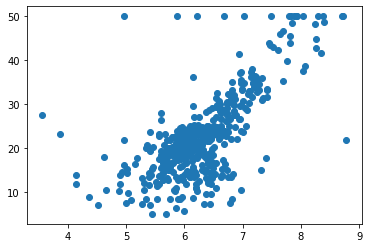

In [0]:
# Positive correlation --> 0.695360
plt.scatter(data['rm'],data['medv'])

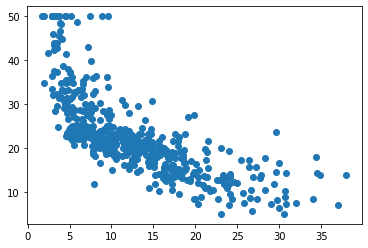

In [0]:
# Negative correlation --> -0.737663	
plt.scatter(data['lstat'],data['medv'])

In [0]:
y_pred = np.array([23,34,27,78,99.3]) 
y_obs = np.array([25,32,25.5,77,95])
# mean squared error(MSE)
np.mean((y_pred-y_obs)**2)

5.947999999999995

In [0]:
from sklearn.metrics import mean_squared_error
mean_squared_error(y_pred,y_obs)

5.947999999999995

In [0]:
# Root mean squared error(RMSE)
np.sqrt(np.mean((y_pred-y_obs)**2))

2.438852189043033

In [0]:
# Mean Absolute error
np.sqrt(np.mean(np.abs(y_pred-y_obs)))

1.4696938456699067

**Create a model with single feature lstat and target is medv**

In [0]:
# Get the featrure data as a dataframe
x_data = data[['lstat']]
y_data = data['medv']

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

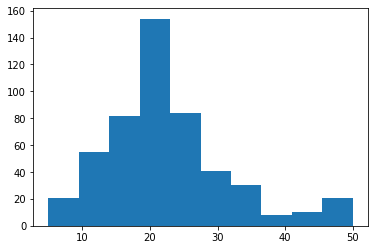

In [0]:
# observe the histogram of the target column
plt.hist(y_data)

In [0]:
# Divide the data for tarining and testing
# train_test_split and use test_size as 0.2
# 20% for testing and 80% for training
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_data,y_data,test_size=0.2)
print(x_train.shape)
print(y_train.shape)

(404, 1)
(404,)


In [0]:
x_data.shape[0]*0.8

404.8

(array([ 21.,  55.,  82., 154.,  84.,  41.,  30.,   8.,  10.,  21.]),
 array([ 5. ,  9.5, 14. , 18.5, 23. , 27.5, 32. , 36.5, 41. , 45.5, 50. ]),
 <a list of 10 Patch objects>)

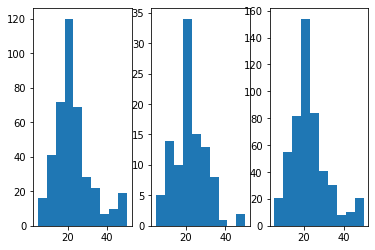

In [0]:
plt.subplot(1,3,1)
plt.hist(y_train)
plt.subplot(1,3,2)
plt.hist(y_test)
plt.subplot(1,3,3)
plt.hist(y_data)

In [0]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train,y_train)
# Predict the output
LR.predict(x_test)

array([24.80834125, 15.19667744, 22.18432788, 28.50139712, 23.78789161,
       29.06507406, 29.0845112 , 31.92233307,  3.87454565, 30.0272123 ,
       28.94845125, 21.26106391, 26.06203653, 24.30297571, 26.12034794,
       24.52650278, 22.88406478, 12.63097547, 23.96282583, 25.27483252,
       19.12297894, 28.78323559, 27.14079759, 20.22117713, 20.73626123,
        5.20598947,  5.02133668, 27.57813315, 27.33516895, 24.95411977,
       23.63239452,  9.07397956, 21.69839947, 27.57813315, 14.34144345,
       14.53581481, 15.99360002, 31.53359035, 18.69536194,  7.4801344 ,
       12.72816115, 23.17562182,  9.30722519, 19.00635612, 28.61801993,
       20.68766839, 24.98327548, 32.17501584, 30.07580514, 23.87535872,
       24.85693409, 25.11933543, 23.9433887 , 16.82939687, 26.53824637,
       26.00372512, 25.7996352 , 28.28758862, 29.7842481 , 31.47527894,
       23.60323881, 29.62875101, 19.71581159, 15.6048573 , 14.10819782,
       21.89277083, 27.03389334, 25.01243118, 18.34549349, 21.73

In [0]:
y_pred = LR.predict(x_test)

In [0]:
y_pred

array([24.80834125, 15.19667744, 22.18432788, 28.50139712, 23.78789161,
       29.06507406, 29.0845112 , 31.92233307,  3.87454565, 30.0272123 ,
       28.94845125, 21.26106391, 26.06203653, 24.30297571, 26.12034794,
       24.52650278, 22.88406478, 12.63097547, 23.96282583, 25.27483252,
       19.12297894, 28.78323559, 27.14079759, 20.22117713, 20.73626123,
        5.20598947,  5.02133668, 27.57813315, 27.33516895, 24.95411977,
       23.63239452,  9.07397956, 21.69839947, 27.57813315, 14.34144345,
       14.53581481, 15.99360002, 31.53359035, 18.69536194,  7.4801344 ,
       12.72816115, 23.17562182,  9.30722519, 19.00635612, 28.61801993,
       20.68766839, 24.98327548, 32.17501584, 30.07580514, 23.87535872,
       24.85693409, 25.11933543, 23.9433887 , 16.82939687, 26.53824637,
       26.00372512, 25.7996352 , 28.28758862, 29.7842481 , 31.47527894,
       23.60323881, 29.62875101, 19.71581159, 15.6048573 , 14.10819782,
       21.89277083, 27.03389334, 25.01243118, 18.34549349, 21.73

In [0]:
y_test

265    22.8
34     13.5
185    29.6
95     28.4
315    16.2
       ... 
371    50.0
470    19.9
30     12.7
196    33.3
372    50.0
Name: medv, Length: 102, dtype: float64

In [0]:
# Not the proper way to evaluate Regression model
(y_test == y_pred).sum()

0

In [0]:
mean_squared_error(y_pred,y_test)

28.696329647361594

In [0]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5634263888620438

**56% times we are predicting the house price correctly when we use a single column i.e lstat**

**Create a model with single feature rm and target is medv**

In [0]:
x_data_rm = data[['rm']]

In [0]:
# train_test_split
x_train_rm,x_test_rm,y_train_rm,y_test_rm = \
        train_test_split(x_data_rm,y_data,test_size =0.2)

In [0]:
# Linear regression
# import the model
from sklearn.linear_model import LinearRegression
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train_rm,y_train_rm)
# Predict the output
LR.predict(x_test_rm)

array([23.54997733, 24.10748015, 25.08311008, 28.41883525, 23.9402293 ,
       33.20406775, 24.85081724, 37.95213339, 16.4139413 , 20.16779359,
       28.80908722, 16.62765071,  6.32314035, 14.41622288, 20.29787758,
       26.84853566, 25.92865601, 24.68356639, 36.48404264, 18.54174371,
       14.4998483 , 23.61501933, 18.77403655, 19.01562111, 18.8762454 ,
       22.23984572, 16.95286069, 29.75684201, 20.13991845, 21.35713293,
       17.41744637, 19.6288742 , 24.03314644, 19.48020678, 25.61273775,
       18.09574146, 24.5534824 , 17.67761435, 26.72774338, 19.76824991,
        7.55893826, 27.51753903, 20.37221129, 14.63922401, 18.93199568,
       12.52071331, 13.31980068, 16.31173245, 20.83679697, 35.04382704,
       18.34661773, 42.36569734, 18.70899456, 26.59765939, 27.82416558,
       31.09484876, 21.80313518, 22.01684459, 20.85538039, 23.81943703,
       32.47002237, 22.39780485, 24.13535529, 17.30594581, 22.31417943,
       23.1132668 , 30.89043107, 22.98318281, 10.10486778, 25.56

In [0]:
r2_score(LR.predict(x_test_rm),y_test_rm)

0.12337121748410351

In [0]:
mean_squared_error(LR.predict(x_test_rm),y_test_rm)

40.5065586648294

**LinearRegression with two columns**

In [0]:
x_data2 = data[["rm","lstat"]]

In [0]:
x_train2,x_test2,y_train2,y_test2 = train_test_split(x_data2,y_data,test_size=0.2)
# Create an instance for the model
LR = LinearRegression()
# Training the model 
LR.fit(x_train2,y_train2)
# Predict the output
LR.predict(x_test2)

array([28.58230503, 38.76708549, 17.1670678 , 20.55721168, 27.43694687,
       31.88121549, 29.48143403, 20.23623103, 18.95370724, 37.43175221,
       20.07642745, -5.3389782 , 22.70255609, 25.5008024 , 21.35759571,
       18.01614573, 20.72525458, 29.28256447, 21.91450166, 25.00904451,
       32.33935851, 15.78441411, 20.81510062, 27.03503952, 31.83457428,
        0.54282791, 25.63317611, 31.49302552, 23.06125453, 17.41535617,
       18.90981709, 18.14098381, 21.89531153, 32.91752442, 21.66211077,
       23.03588022, 21.59628596, 17.51206641, 17.65194556, 19.27124374,
       19.83845191, 26.73532536, 24.14282424, 33.32904092, 27.58920256,
       19.44067116, 25.85674447, 23.72651827, 14.63425057, 26.27444066,
       18.98251672, 20.65322721,  4.6949866 ,  9.21605287, 19.89468431,
       22.8040558 , 18.15264768, 27.83131491, 28.08163597, 23.57425442,
       30.0191523 , 22.90694003, 19.94886566,  3.77455681, 32.02180364,
       20.59494947, 26.16744004, 26.07827156,  2.90077151, 21.31

In [0]:
#mse
mean_squared_error(LR.predict(x_test2),y_test2)

35.03593556567535

In [0]:
r2_score(LR.predict(x_test2),y_test2)

0.4609636648337788

In [0]:
data.describe()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,b,lstat,medv
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677082,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000
